In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler   
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#for ML model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [3]:
Y_train = train['5'].values # Y is now a numpy array
X_train = train.drop(['5'],axis=1)
Y_test = test['7'].values # Y is now a numpy array
X_test = test.drop(['7'],axis=1)

In [33]:
pd.set_option('display.max_columns', None)
X_train

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102,0.103,0.104,0.105,0.106,0.107,0.108,0.109,0.110,0.111,0.112,0.113,0.114,0.115,0.116,0.117,0.118,0.119,0.120,0.121,0.122,0.123,0.124,0.125,0.126,0.127,0.128,0.129,0.130,0.131,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139,0.140,0.141,0.142,0.143,0.144,0.145,0.146,0.147,0.148,0.149,0.150,0.151,3,18,18.1,18.2,126,136,175,26,166,255,247,127,0.152,0.153,0.154,0.155,0.156,0.157,0.158,0.159,0.160,0.161,0.162,0.163,30,36,94,154,170,253,253.1,253.2,253.3,253.4,225,172,253.5,242,195,64,0.164,0.165,0.166,0.167,0.168,0.169,0.170,0.171,0.172,0.173,0.174,49,238,253.6,253.7,253.8,253.9,253.10,253.11,253.12,253.13,251,93,82,82.1,56,39,0.175,0.176,0.177,0.178,0.179,0.180,0.181,0.182,0.183,0.184,0.185,0.186,18.3,219,253.14,253.15,253.16,253.17,253.18,198,182,247.1,241,0.187,0.188,0.189,0.190,0.191,0.192,0.193,0.194,0.195,0.196,0.197,0.198,0.199,0.200,0.201,0.202,0.203,0.204,80,156,107,253.19,253.20,205,11,0.205,43,154.1,0.206,0.207,0.208,0.209,0.210,0.211,0.212,0.213,0.214,0.215,0.216,0.217,0.218,0.219,0.220,0.221,0.222,0.223,0.224,14,1,154.2,253.21,90,0.225,0.226,0.227,0.228,0.229,0.230,0.231,0.232,0.233,0.234,0.235,0.236,0.237,0.238,0.239,0.240,0.241,0.242,0.243,0.244,0.245,0.246,0.247,0.248,0.249,139,253.22,190,2,0.250,0.251,0.252,0.253,0.254,0.255,0.256,0.257,0.258,0.259,0.260,0.261,0.262,0.263,0.264,0.265,0.266,0.267,0.268,0.269,0.270,0.271,0.272,0.273,11.1,190.1,253.23,70,0.274,0.275,0.276,0.277,0.278,0.279,0.280,0.281,0.282,0.283,0.284,0.285,0.286,0.287,0.288,0.289,0.290,0.291,0.292,0.293,0.294,0.295,0.296,0.297,0.298,35,241.1,225.1,160,108,1.1,0.299,0.300,0.301,0.302,0.303,0.304,0.305,0.306,0.307,0.308,0.309,0.310,0.311,0.312,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.320,0.321,81,240,253.24,253.25,119,25,0.322,0.323,0.324,0.325,0.326,0.327,0.328,0.329,0.330,0.331,0.332,0.333,0.334,0.335,0.336,0.337,0.338,0.339,0.340,0.341,0.342,0.343,0.344,45,186,253.26,253.27,150,27,0.345,0.346,0.347,0.348,0.349,0.350,0.351,0.352,0.353,0.354,0.355,0.356,0.357,0.358,0.359,0.360,0.361,0.362,0.363,0.364,0.365,0.366,0.367,16,93.1,252,253.28,187,0.368,0.369,0.370,0.371,0.372,0.373,0.374,0.375,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,249,253.29,249.1,64.1,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,46,130,183,253.30,253.31,207,2.1,0.414,0.415,0.416,0.417,0.418,0.419,0.420,0.421,0.422,0.423,0.424,0.425,0.426,0.427,0.428,0.429,0.430,0.431,0.432,39.1,148,229,253.32,253.33,253.34,250,182.1,0.433,0.434,0.435,0.436,0.437,0.438,0.439,0.440,0.441,0.442,0.443,0.444,0.445,0.446,0.447,0.448,0.449,0.450,24,114,221,253.35,253.36,253.37,253.38,201,78,0.451,0.452,0.453,0.454,0.455,0.456,0.457,0.458,0.459,0.460,0.461,0.462,0.463,0.464,0.465,0.466,0.467,23,66,213,253.39,253.40,253.41,253.42,198.1,81.1,2.2,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475,0.476,0.477,0.478,0.479,0.480,0.481,0.482,0.483,18.4,171,219.1,253.43,253.44,253.45,253.46,195.1,80.1,9,0.484,0.485,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499,55,172.1,226,253.47,253.48,253.49,253.50,244,133,11.2,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,136.1,253.51,253.52,253.53,212,135,132,16.1,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val=train_test_split(X_train,Y_train,test_size=0.2)

In [6]:
#For the [0,1] scaling simply divide by 255.

X_train_scaled = X_train/255
X_val_scaled = X_val/255
X_test_scaled = X_test/255

In [7]:
print("The shape of the training features",X_train_scaled.shape)   #(47999, 784)
print("The shape of the validation features", X_val_scaled.shape)  #(12000, 784)
print("The shape of the testing features", X_test_scaled.shape)    #( 9999, 784)

The shape of the training features (47999, 784)
The shape of the validation features (12000, 784)
The shape of the testing features (9999, 784)


In [15]:
gnb_model = GaussianNB()
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=10)}  # Calculation Stability to Widen (or Smooth) the Curve

gnb_grid = GridSearchCV(estimator=gnb_model, param_grid=param_grid_nb,scoring='accuracy', verbose=1, cv=5)

gnb_grid_result = gnb_grid.fit(X_train_scaled, Y_train)

print('\nBest Score: ', gnb_grid_result.best_score_)             
print('\nBest Params: ', gnb_grid_result.best_params_)           
print('\nValidation Score:', gnb_grid_result.score(X_val_scaled, Y_val))

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Score:  0.8004333480918151

Best Params:  {'var_smoothing': 0.1}

Validation Score: 0.8018333333333333


In [16]:
tsvd = TruncatedSVD(n_components=783)
truncated_X_train = tsvd.fit_transform(X_train_scaled)
tsvd_var_ratios = tsvd.explained_variance_ratio_
tsvd_var_ratios.sum()

1.0000000000000009

In [17]:
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        print(n_components,total_variance,explained_variance,goal_var)
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [18]:
feature_number = select_n_components(tsvd_var_ratios, 0.90) 

1 0.05814585405286515 0.05814585405286515 0.9
2 0.14061421260847673 0.08246835855561158 0.9
3 0.2117960236079476 0.07118181099947088 0.9
4 0.2727319075689453 0.06093588396099764 0.9
5 0.32550876750282254 0.05277685993387725 0.9
6 0.36864883795257597 0.04314007044975341 0.9
7 0.4049153823744107 0.03626654442183474 0.9
8 0.4340633268075312 0.02914794443312049 0.9
9 0.4627803796972433 0.028717052889712127 0.9
10 0.4864199963152133 0.02363961661797003 0.9
11 0.5077187894591537 0.02129879314394041 0.9
12 0.5282907608019032 0.020571971342749455 0.9
13 0.5454692154120504 0.017178454610147262 0.9
14 0.5625618335677894 0.017092618155739057 0.9
15 0.578465654238056 0.015903820670266546 0.9
16 0.5933424059037706 0.014876751665714668 0.9
17 0.6069706159692698 0.013628210065499191 0.9
18 0.6198872096240978 0.012916593654828046 0.9
19 0.6317443587910947 0.011857149166996862 0.9
20 0.6433411426584559 0.011596783867361201 0.9
21 0.6539865720496069 0.010645429391150986 0.9
22 0.664097019185761 0.010110

In [19]:
final_tsvd = TruncatedSVD(n_components=feature_number)  

In [20]:
final_truncated_X_train = final_tsvd.fit_transform(X_train_scaled)
final_truncated_X_val = final_tsvd.transform(X_val_scaled)
final_truncated_X_test = final_tsvd.transform(X_test_scaled)

In [21]:
print("The shape of the training features after SVD",final_truncated_X_train.shape)
print("The shape of the validation features after SVD", final_truncated_X_val.shape)
print("The shape of the testing features after SVD", final_truncated_X_test.shape)

The shape of the training features after SVD (47999, 87)
The shape of the validation features after SVD (12000, 87)
The shape of the testing features after SVD (9999, 87)


In [22]:
final_tsvd_var_ratios = final_tsvd.explained_variance_ratio_

In [23]:
print("Explained Variance Ratios Sum:",round(final_tsvd.explained_variance_ratio_.sum()*100),"%")
print("We are able to explain around 90% variance in the dataset using just {} components".format(feature_number))

Explained Variance Ratios Sum: 90 %
We are able to explain around 90% variance in the dataset using just 87 components


Text(0.5, 0, 'Eigenvectors')

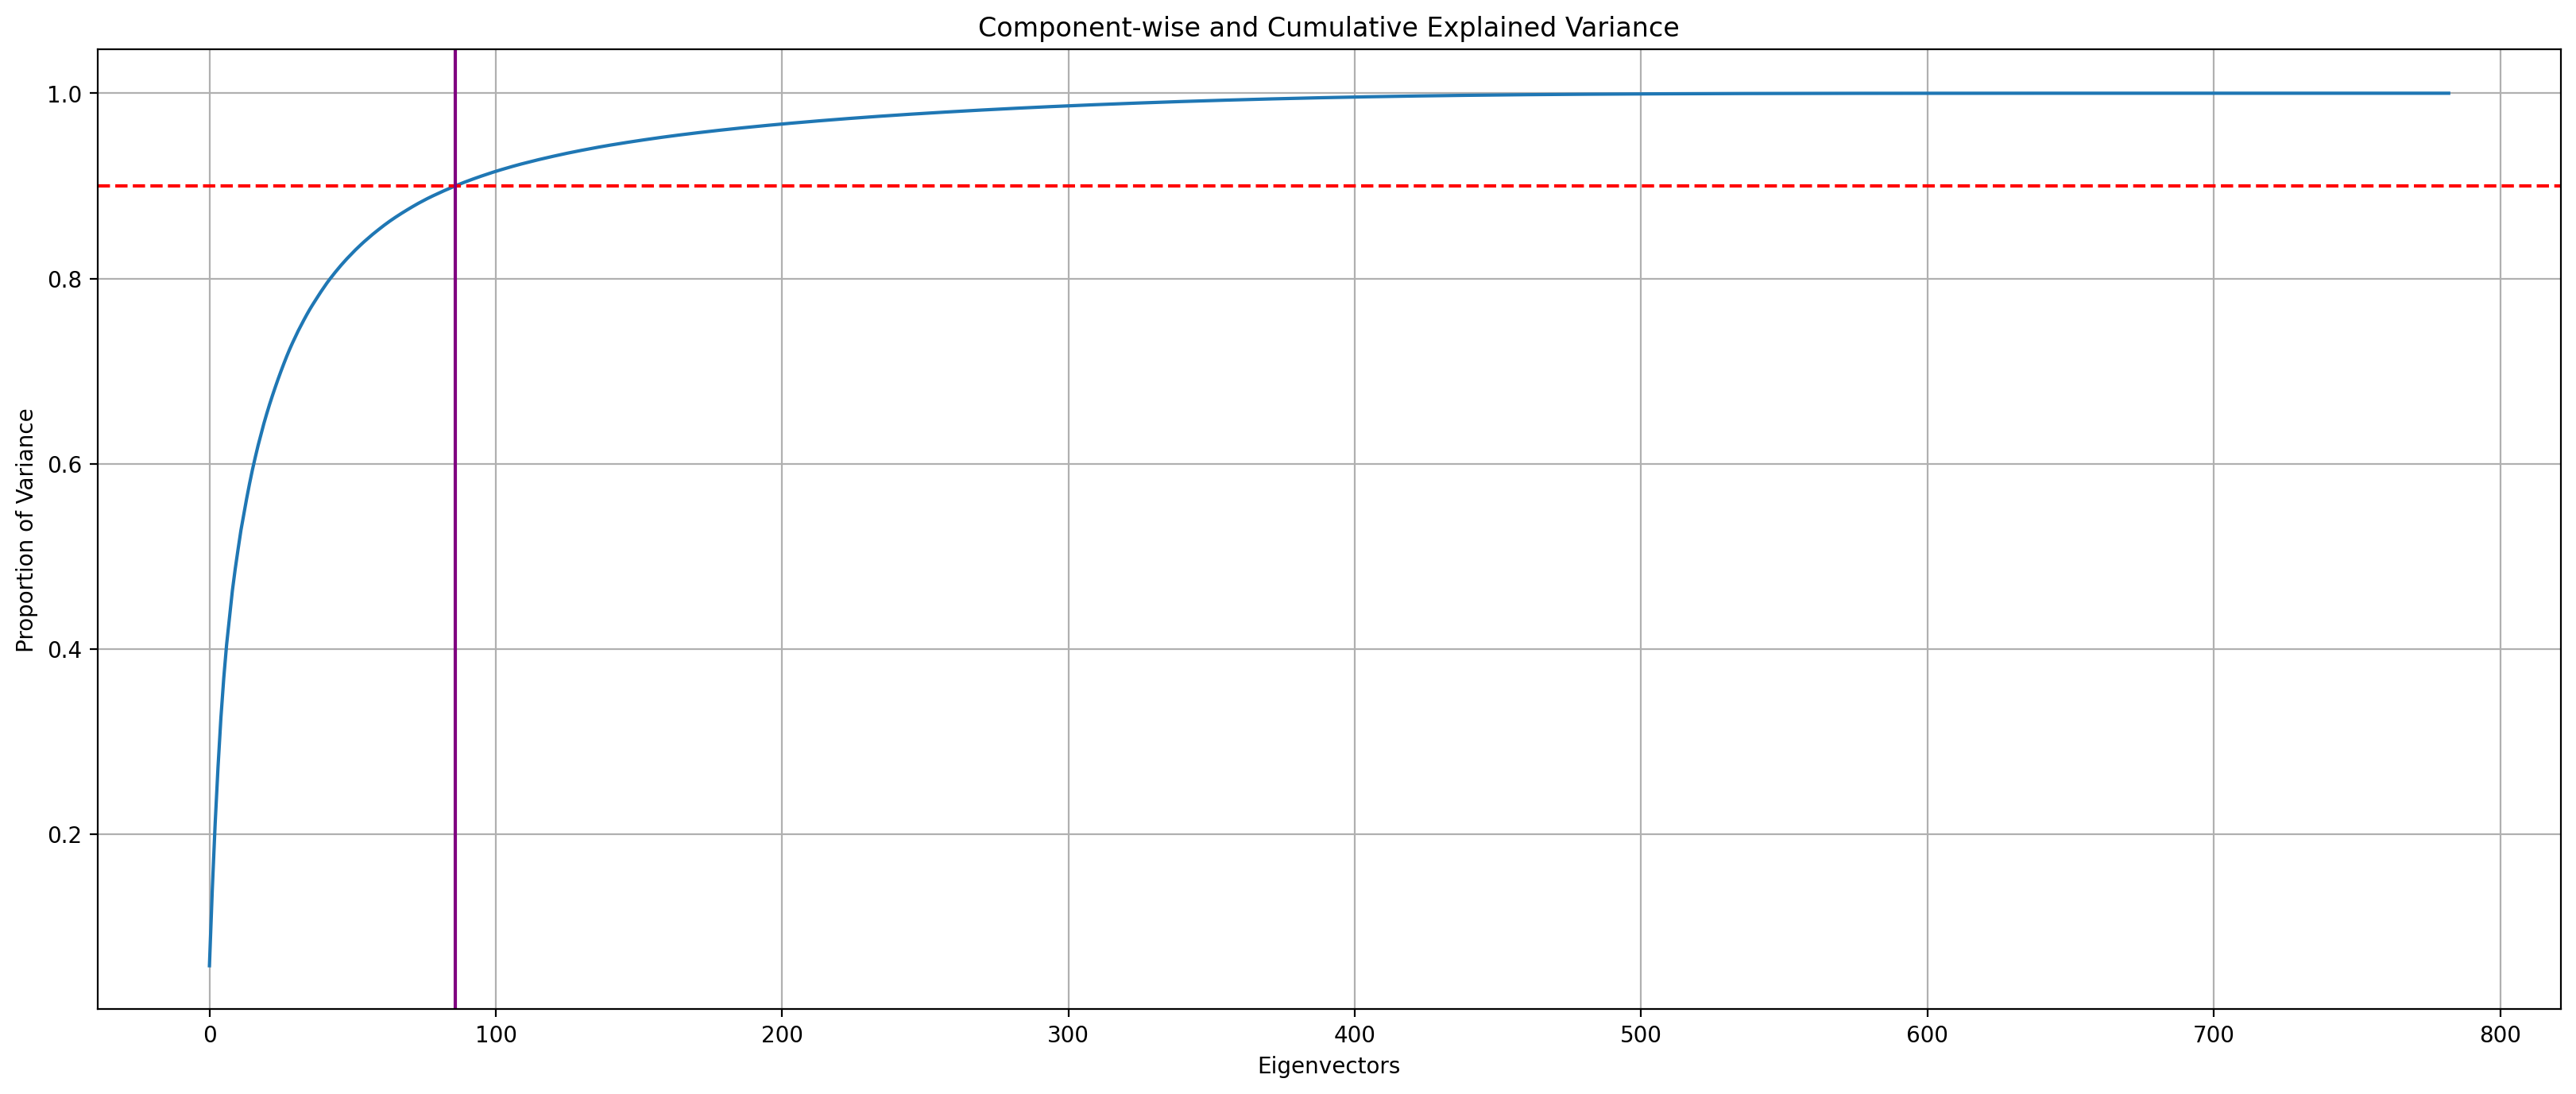

In [24]:
fig = plt.figure(1, figsize=(20, 8), dpi=200)
x = range(783)
y = np.cumsum(tsvd.explained_variance_ratio_)
plt.grid()
plt.plot(x, y)
plt.axhline(y=0.9,color='r', linestyle='--')
plt.axvline(x=np.interp(0.9,y,x),ymin=0,ymax=1,color='purple')

plt.title("Component-wise and Cumulative Explained Variance")
plt.ylabel("Proportion of Variance")
plt.xlabel("Eigenvectors")

Text(0.5, 0, 'Eigenvectors')

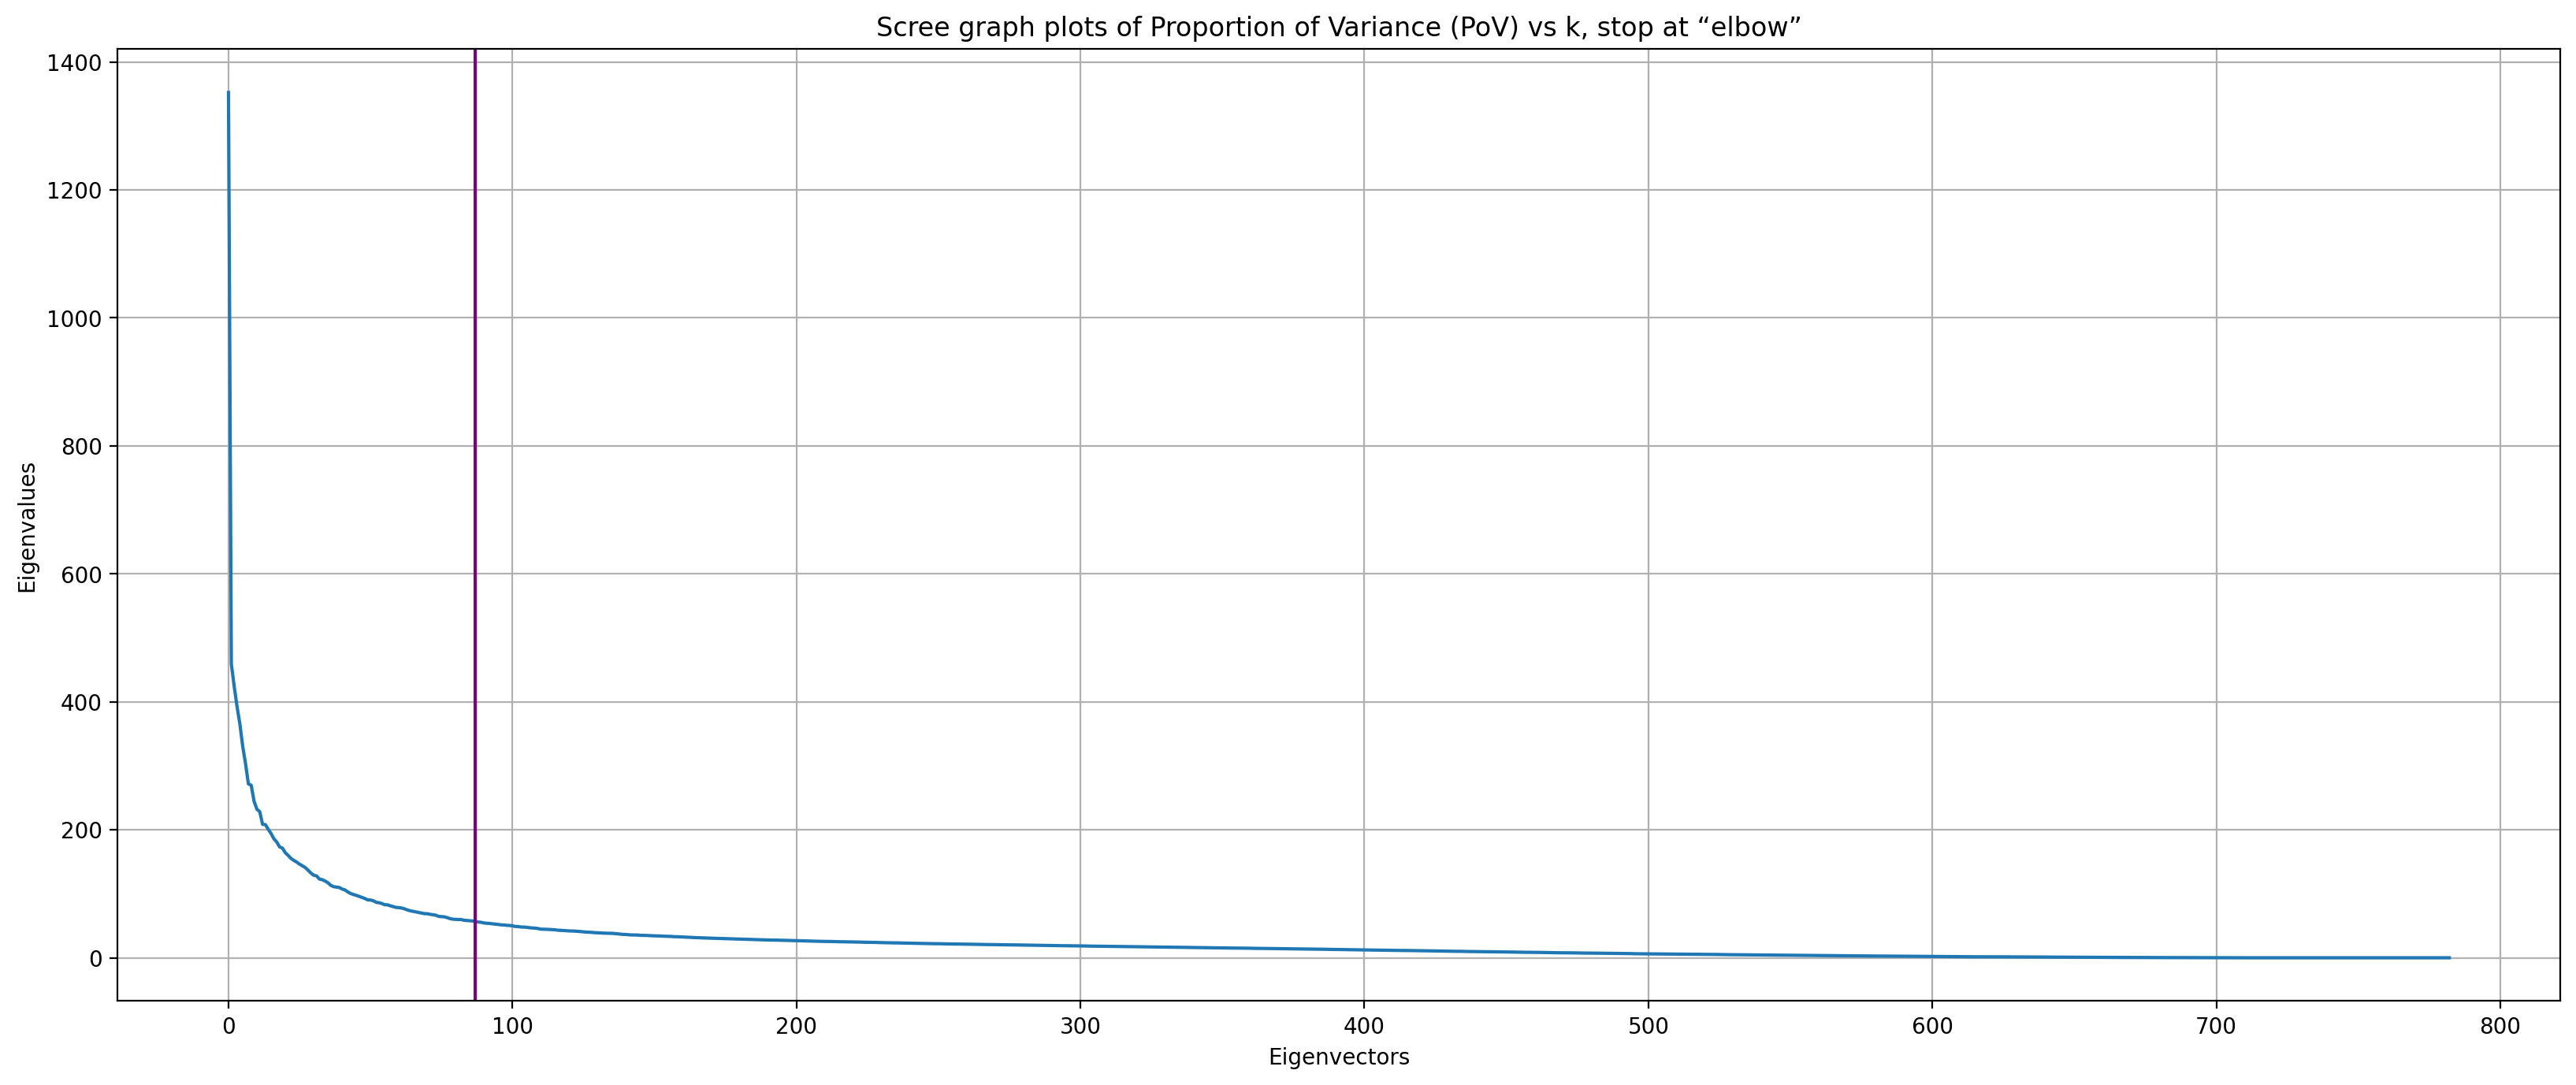

In [25]:
fig = plt.figure(1, figsize=(20, 8), dpi=200)
y = tsvd.singular_values_
x = range(783)
plt.grid()
plt.plot(x,y)
#plt.plot(range(783), tsvd.explained_variance_ratio_)
plt.axvline(x=feature_number,ymin=0,ymax=1,color='purple')

plt.title("Scree graph plots of Proportion of Variance (PoV) vs k, stop at “elbow”")
plt.ylabel("Eigenvalues")
plt.xlabel("Eigenvectors")

In [26]:
gnb_model = GaussianNB()
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=10)}  # Calculation Stability to Widen (or Smooth) the Curve

gnb_grid = GridSearchCV(estimator=gnb_model, param_grid=param_grid_nb,scoring='accuracy', verbose=1, cv=5)

gnb_grid_result = gnb_grid.fit(final_truncated_X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [27]:
print('\nBest Score: ', gnb_grid_result.best_score_)             
print('\nBest Params: ', gnb_grid_result.best_params_)           
print('\nValidation Score:', gnb_grid_result.score(final_truncated_X_val, Y_val))


Best Score:  0.87149724363649

Best Params:  {'var_smoothing': 0.001}

Validation Score: 0.8769166666666667


In [28]:
Y_test_pred_nb = gnb_grid_result.predict(final_truncated_X_test)

In [29]:
print(classification_report(Y_test, Y_test_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       980
           1       0.97      0.95      0.96      1135
           2       0.82      0.86      0.84      1032
           3       0.86      0.88      0.87      1010
           4       0.89      0.88      0.88       982
           5       0.82      0.85      0.84       892
           6       0.93      0.92      0.93       958
           7       0.92      0.84      0.88      1027
           8       0.84      0.85      0.84       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88      9999
   macro avg       0.88      0.88      0.88      9999
weighted avg       0.89      0.88      0.88      9999



In [30]:
gnb_accuracy = accuracy_score(Y_test, Y_test_pred_nb)

In [31]:
print("Accuracy Score on the Test set:", gnb_accuracy) 

Accuracy Score on the Test set: 0.8843884388438844
